In [67]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import rankdata
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.gridspec import GridSpec

In [68]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
cmaps = plt.colormaps()
blues = cm.get_cmap("YlGn",lut=15)
spec = cm.get_cmap("RdPu",lut =12)
purp = cm.get_cmap("BuPu",lut=12)
c_blues = [blues(i) for i in range(15)]
c_spec = [spec(i) for i in range(13)]
c_purp = [purp(i) for i in range(13)]

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 11})

/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_32435/3911210781.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  blues = cm.get_cmap("YlGn",lut=15)
/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_32435/3911210781.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  spec = cm.get_cmap("RdPu",lut =12)
/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_32435/3911210781.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  purp = cm.get_cmap("BuPu",l

plot per coupling

In [69]:
coup = [5]
coupl = [1]

#for i in coup:
    #coupl.append(int(i))
beta = [3.3,3.57,3.84,4.16,4.54,5,5.55,6.25,7.14,8.33,10,12.5,16.66,25]
#beta2 = [10,11.4,13.2,15.7,19.5,25.4,36.8,66.7]
a = 0
b=0
c = 0
d = 0

for i in coupl:
    globals()['TOcoup{}'.format(a)] = pd.read_csv('./TOA_coup_{}.txt'.format(i),header=None,delim_whitespace=True)
    a += 1

for i in coupl:
    globals()['NCcoup{}'.format(b)] = pd.read_csv('./NCA_size3_coup_{}.txt'.format(i),header=None,delim_whitespace=True)
    b += 1

for i in coupl:
    globals()['OCcoup{}'.format(c)] = pd.read_csv('./OCA_size3_coup_{}.txt'.format(i),header=None,delim_whitespace=True)
    c += 1
'''
for i in coupl:
    globals()['NCcoup9{}'.format(d)] = pd.read_csv('./OCA_size9_coup_{}.txt'.format(i),header=None,delim_whitespace=True)
    d += 1
'''

"\nfor i in coupl:\n    globals()['NCcoup9{}'.format(d)] = pd.read_csv('./OCA_size9_coup_{}.txt'.format(i),header=None,delim_whitespace=True)\n    d += 1\n"

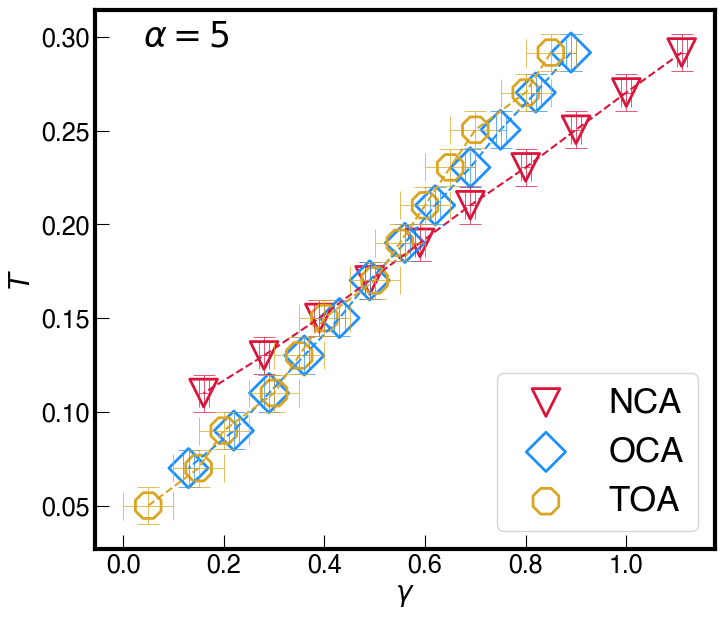

In [105]:
a = 0
b=0
c=0
d=0
mark = ['v','o','D','^','s','p','8','*','D','>','d','<','v','.']

fig = plt.figure(figsize=(8,7))
#plt.title(r"$\alpha$ = " + str(aarr[10]))

err = np.abs(1/beta[2]-1/beta[1])/2
errx = 2/200
errxx = 0.05

plt.rcParams["font.family"] = "Helvetica"
plt.rcParams.update({'font.size': 12})
mpl.rcParams['axes.linewidth'] = 3

#plt.title(r"NCA OCA TOA Crossing comparision in $\alpha$ = 5 , 20")

for i in coupl:
    #plt.errorbar(globals()['NCcoup{}'.format(b)][1][-1:],globals()['NCcoup{}'.format(b)][0][-1:],yerr=[[0], [err]],fmt='', capsize=4, capthick=0.5, ecolor="crimson", linestyle='None',linewidth=0.5)
    plt.errorbar(globals()['NCcoup{}'.format(b)][1][:],globals()['NCcoup{}'.format(b)][0][:],yerr=err,fmt='', capsize=8, capthick=0.5, ecolor="crimson", linestyle='None',linewidth=0.5)
    plt.errorbar(globals()['NCcoup{}'.format(b)][1],globals()['NCcoup{}'.format(b)][0],xerr=errx,fmt='',capsize=10, capthick=0.5, ecolor="crimson", linestyle='None',linewidth=0.5)


    plt.scatter(globals()['NCcoup{}'.format(b)][1],globals()['NCcoup{}'.format(b)][0],label="NCA",color ="crimson" ,linewidth =2, marker = mark[b], facecolors = 'none' , s = 400)
    plt.plot(globals()['NCcoup{}'.format(b)][1],globals()['NCcoup{}'.format(b)][0],linewidth=1.5,ls='--',color ="crimson" )

    b += 1
for i in coupl:
    #plt.errorbar(globals()['OCcoup{}'.format(c)][1][-1:],globals()['OCcoup{}'.format(c)][0][-1:],yerr=[[0], [err]],fmt='', capsize=4, capthick=0.5, ecolor="dodgerblue", linestyle='None',linewidth=0.5)
    plt.errorbar(globals()['OCcoup{}'.format(c)][1][:],globals()['OCcoup{}'.format(c)][0][:],yerr=err,fmt='', capsize=8, capthick=0.5, ecolor="dodgerblue", linestyle='None',linewidth=0.5)
    plt.errorbar(globals()['OCcoup{}'.format(c)][1],globals()['OCcoup{}'.format(c)][0],xerr=errx,fmt='',capsize=10, capthick=0.5, ecolor="dodgerblue", linestyle='None',linewidth=0.5)

    plt.scatter(globals()['OCcoup{}'.format(c)][1],globals()['OCcoup{}'.format(c)][0],label="OCA",color = "dodgerblue",linewidth =2, marker = mark[c+2], facecolors = 'none' , s = 400)
    plt.plot(globals()['OCcoup{}'.format(c)][1],globals()['OCcoup{}'.format(c)][0],linewidth=1.5,ls='--',color = "dodgerblue")

    c += 1

for i in coupl:
    #plt.errorbar(globals()['TOcoup{}'.format(a)][1][-1:],globals()['TOcoup{}'.format(a)][0][-1:],yerr=[[0], [err]],fmt='', capsize=4, capthick=0.5, ecolor="goldenrod", linestyle='None',linewidth=0.5)
    plt.errorbar(globals()['TOcoup{}'.format(a)][1][:],globals()['TOcoup{}'.format(a)][0][:],yerr=err,fmt='', capsize=8, capthick=0.5, ecolor="goldenrod", linestyle='None',linewidth=0.5)
    plt.errorbar(globals()['TOcoup{}'.format(a)][1],globals()['TOcoup{}'.format(a)][0],xerr=errxx,fmt='',capsize=10, capthick=0.5, ecolor="goldenrod", linestyle='None',linewidth=0.5)

    plt.scatter(globals()['TOcoup{}'.format(a)][1],globals()['TOcoup{}'.format(a)][0],label="TOA",color = "goldenrod",linewidth =2, marker = mark[a+6], facecolors = 'none' , s = 400)
    plt.plot(globals()['TOcoup{}'.format(a)][1],globals()['TOcoup{}'.format(a)][0],linewidth=1.5,ls='--',color = "goldenrod")

    a += 1
#plt.errorbar(TOcoup0[1],TOcoup0[0],yerr=err,fmt='', capsize=4, capthick=0.5, ecolor=c_blues[1], linestyle='None',linewidth=0.5,label=r' $\pm\frac{\Delta (Temp)}{2}$')
'''
for i in coupl:
    plt.errorbar(globals()['TOcoup7{}'.format(c)][1][-1:],globals()['TOcoup7{}'.format(c)][0][-1:],yerr=[[0], [err]],fmt='', capsize=4, capthick=0.5, ecolor=c_blues[1], linestyle='None',linewidth=0.5)
    plt.errorbar(globals()['TOcoup7{}'.format(c)][1][:-1],globals()['TOcoup7{}'.format(c)][0][:-1],yerr=err,fmt='', capsize=4, capthick=0.5, ecolor=c_blues[1], linestyle='None',linewidth=0.5)
    plt.scatter(globals()['TOcoup7{}'.format(c)][1],globals()['TOcoup7{}'.format(c)][0],label=r'size 7 , $\alpha$ = ' + str(i),color = c_blues[c+6],linewidth =1, marker = 'X', facecolors = 'none' , s = 100)
    plt.plot(globals()['TOcoup7{}'.format(c)][1],globals()['TOcoup7{}'.format(c)][0],linewidth=1,ls='--',color = c_blues[c+6])

    c += 1
for i in coupl:
    plt.errorbar(globals()['TOcoup9{}'.format(d)][1][-1:],globals()['TOcoup9{}'.format(d)][0][-1:],yerr=[[0], [err]],fmt='', capsize=4, capthick=0.5, ecolor=c_blues[1], linestyle='None',linewidth=0.5)
    plt.errorbar(globals()['TOcoup9{}'.format(d)][1][:-1],globals()['TOcoup9{}'.format(d)][0][:-1],yerr=err,fmt='', capsize=4, capthick=0.5, ecolor=c_blues[1], linestyle='None',linewidth=0.5)
    plt.scatter(globals()['TOcoup9{}'.format(d)][1],globals()['TOcoup9{}'.format(d)][0],label=r'size 9 , $\alpha$ = ' + str(i),color = c_blues[d+10],linewidth =1, marker = 'P', facecolors = 'none' , s = 100)
    plt.plot(globals()['TOcoup9{}'.format(d)][1],globals()['TOcoup9{}'.format(d)][0],linewidth=1,ls='--',color = c_blues[d+10])

    d += 1
'''

plt.xlabel(r"$\gamma$",style = "italic",fontsize=20)
plt.ylabel("$\it{T}$",fontsize=20)
plt.text(0.04, 0.295, r'$\alpha = 5$',fontsize=25)
#plt.ylabel(r"Temp [1/$\beta$]")
#plt.xlim([0,1])
#plt.ylim([0.0,0.35])

plt.tick_params(axis='x',direction='in',size=10)
plt.tick_params(axis='y',direction='in',size=10)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18) 

#plt.grid()
plt.legend(fontsize=25,loc='lower right')
#plt.show()
plt.savefig("/Users/e2_602_qma/test.pdf",format='pdf',bbox_inches='tight')

In [98]:
(1/3.84 + 1/3.57)/2

0.2702643557422969

In [94]:
(0.3+0.28)/2

0.29000000000000004

In [95]:
(0.27+0.29)/2

0.28

In [99]:
1/3.84

0.2604166666666667

In [101]:
1/25

0.04